In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/test_data/test_images/"
print(os.path.isdir(path))

True


In [3]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,20))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

In [4]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from matplotlib import pyplot as plt
import rembg
from rembg import remove
import os
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from PIL import Image, ImageDraw

In [6]:
def get_subfiles(dir):
  "Get a list of immediate subfiles"
  return next(os.walk(dir))[2]

In [7]:
all_names = get_subfiles(path)
print("Number of Images:", len(all_names))
IMG = []
for i in range(len(all_names)):
  tmp = cv2.imread(path + all_names[i])
  IMG.append(tmp)
SegDataIMG = IMG.copy()
SegDataName = all_names

Number of Images: 98


In [8]:
output_path =  "/content/drive/MyDrive/EKLIPSE AI Engineer Test/Img_Cropper/"

## Cropping image and remove background to get hero images in circle for training or predict (image processing)

In [12]:
for i in range(len(SegDataName)):
    img_shape = SegDataIMG[i].shape
    cropped_image = SegDataIMG[i][:, 0:img_shape[1]//2]
    #if (cropped_image.shape[1]/cropped_image.shape[0]) > 1.8:
    cropped_image = cropped_image[0:cropped_image.shape[0], 10: cropped_image.shape[0]+10]
    input = Image.fromarray(cropped_image)
    output = remove(input) # remove background
    img_arr = np.asarray(output)
    img_show = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)
    # plt.imshow(img_show)
    # plt.show()
    cv2.imwrite(os.path.join(output_path , SegDataName[i]), img_arr)

## USE HoughCircles/Edge Detection => NOT GET CIRCLE 

In [ ]:
count_circle = 0
for i in range(len(SegDataName)):
    img_shape = SegDataIMG[i].shape
    cropped_image = SegDataIMG[i][:, 0:img_shape[1]//2]
    # Gaussian Blur
    cropped_image = cv2.GaussianBlur(cropped_image, (3, 3), 0)
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    # Apply edge detection
    edges = cv2.Canny(gray, 100, 200)
    plt.imshow(edges)
    # plt.imshow(gray)
    plt.show()
    # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 75)
    # print(circles)

Output hidden; open in https://colab.research.google.com to view.

## GET HERO TEMPLATES TO USE TEMPLATE MATCHING / SIFT

In [49]:
path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/all_heros.jpg"

(721, 1648, 3)


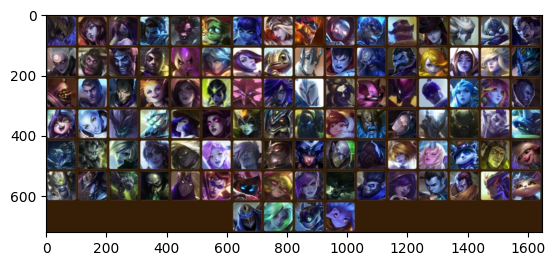

In [50]:
heros_img = cv2.imread(path)
print(heros_img.shape)
plt.imshow(heros_img)
plt.show()

In [51]:
name_ls = ["Aatrox", "Ahri", "Akali", "Akshan", "Alistar", "Amumu", "Annie", "Ashe", "Aurelion_Sol", "Blitzcrank", "Brand", "Braum", "Caitlyn", "Camille", "Corki", "Darius", 
           "Diana", "Dr._Mundo", "Draven", "Ekko", "Evelynn", "Ezreal", "Fiora", "Fizz", "Galio", "Garen", "Gragas", "Graves", "Gwen", "Irelia", "Janna", "Jarvan_IV", 
           "Jax", "Jayce", "Jhin", "Jinx", "Kai'Sa", "Karma", "Kassadin", "Katarina", "Kayle", "Kayn", "Kennen", "Kha'Zix", "Lee_Sin", "Leona", "Lillia", "Lucian", 
           "Lulu", "Lux", "Malphite", "Master_Yi", "Miss_Fortune", "Morgana", "Nami", "Nasus", "Nautilus", "Nunu & Willump", "Olaf", "Orianna", "Pantheon", "Pyke", "Rakan", "Rammus", 
           "Renekton", "Rengar", "Riven", "Samira", "Senna", "Seraphine", "Sett", "Shen", "Shyvana", "Singed", "Sion", "Sona", "Soraka","Teemo", "Thresh", "Tristana", 
           "Tryndamere", "Twisted_Fate", "Twitch", "Urgot", "Varus", "Vayne", "Veigar", "Vex", "Vi", "Warwick", "Wukong", "Xayah", "Xin_Zhao", "Yasuo", "Yone", "Yuumi", 
           "1", "2", "3", "4", "5", "6", "Zed", "Zeri", "Ziggs", "Zoe", "7", "8", "9", "10", "11", "12"]

In [81]:
out_path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/hero_template/"
h = int(heros_img.shape[1]/16)
top = 0
bot = h
left = 0
right = h
k = 0
for i in range(7):
    for j in range(16):
        hero_img = heros_img[top:bot, left:right]
        hero_img = hero_img[5:hero_img.shape[1]-5, 5:hero_img.shape[1]-5]
        # hero_img = cv2.cvtColor(hero_img, cv2.COLOR_RGB2BGR)
        # img = cv2.imread(path)

        h1 = hero_img.shape[0]
        w1 = hero_img.shape[1]

        # creating luminous image
        lum_img = Image.new('L',[h1,w1] ,0)
        draw = ImageDraw.Draw(lum_img)
        draw.pieslice([(0,0),(h1,w1)],0,360,fill=255, outline = "black")
        img_arr = np.array(hero_img)
        lum_img_arr = np.array(lum_img)

        final_img_arr = np.dstack((img_arr, lum_img_arr))
        # ShowImage([final_img_arr], 1, 4)
        cv2.imwrite(os.path.join(out_path, name_ls[k]+".png"), final_img_arr)
        k += 1
        # print(k)
        left += h
        right += h
    top += h
    bot += h
    left = 0
    right = h

In [22]:
path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/Img_Cropper/Ahri_278220660753197_round6_Ahri_06-02-2021.mp4_10_2.jpg"
he = cv2.imread(path)

## Using Template Matching for Predict Heros image

In [60]:
def template_match(img, template):
    img2 = img.copy()
    h = template.shape[0]
    w = template.shape[1]
    methods = ['cv2.TM_CCOEFF_NORMED']

    for meth in methods:
        img = img2.copy()
        method = eval(meth)

    res = cv2.matchTemplate(img,template,method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    return min_val, max_val, min_loc, max_loc

In [77]:
path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/hero_template/"
all_names = get_subfiles(path)
print("Number of Images:", len(all_names))
IMG = []
for i in range(len(all_names)):
  tmp = cv2.imread(path + all_names[i])
  IMG.append(tmp)
hero_temp_ls = IMG.copy()
hero_name = all_names

Number of Images: 100


In [82]:
for i in range(len(hero_name)):
    template_img = IMG[i]
    img_path2 = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/Img_Cropper/Akali_9Aa4KRvaLFA_round3_Fizz_05-19-2021.mp4_50_1.jpg"
    heros_img2 = cv2.imread(img_path2)
    print(heros_img2.shape)

    h = template_img.shape[0]
    w = template_img.shape[1]
    heros_img2 = cv2.resize(heros_img2, (h,w), interpolation = cv2.INTER_AREA)

    ShowImage([template_img, heros_img2], 1, 4)
    temp = template_match(heros_img2, template_img)
    print(heros_img2.shape)
    print(temp)

Output hidden; open in https://colab.research.google.com to view.

## Try with SIFT

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('home.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)

sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)